# Set simulatin parameters, run simulation and save pickle file for all mc's of each model 


In [56]:
import numpy as np
import scipy as sp 
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import linear_model

import pickle
import os

In [57]:
horizon = 2
dim_tru = 8
r2_coef_0 = np.ones(dim_tru)
r2_coef_0[-1] = 0
r2_coef_1 = np.ones(dim_tru)
r2_coef_1[-1] = 0

diff = .2
r2_coef_1[1] += diff


In [58]:
DATA_DIR = 'data/'
RES_DIR = 'res/'

In [72]:
p = 100

n0 = 30
n0_list = np.array([30], dtype=int)
n1_list = np.array([40, 50, 60, 70, 80], dtype=int)

#n0 = 50
#n0_list = np.array([50], dtype=int)
#n1_list = np.array([60, 70, 80, 90, 100], dtype=int)

## n0 = 70
#n0_list = np.array([70], dtype=int)
#n1_list = np.array([80, 90, 100, 110, 120], dtype=int)

num_mc = 200

#settings = np.array([[n0, n1] for n0 in n0_list for n1 in (n0 * ra_list).astype(int) ])
settings = np.array([[p, n0, n1] 
                     for n0 in n0_list 
                     for n1 in n1_list])
# settings

# Load data, process and plot

In [73]:
distn = 'n'
noise_var = 1

for row, (dim_obs, num_obs_0, num_obs_1) in enumerate(settings):
    
    print('Loading data of model #' + str(row) +
          ' with (diff, p, n_0, n_1)=(' + str(diff) + ', ' + str(dim_obs) + ', ' + 
          str(num_obs_0) + ', ' + str(num_obs_1) + ').')
    
    dump = 'diff-' + str(diff) + '-p-' + str(dim_obs) + '-n0-' + \
            str(num_obs_0) + '-n1-' + str(num_obs_1) + '-x-' + \
            distn + '-e-' + str(noise_var) + '-no-cv.pkl'
    
    res_list = pickle.load(open(os.path.join(DATA_DIR, dump),'rb'))
    
    # res_array: num_mc * 4 x dim_obs
    res_array = np.hstack(res_list).transpose()
    
    if row == 0:
        all_res_array = res_array
    else:
        all_res_array = np.vstack([all_res_array, res_array])

Loading data of model #0 with (diff, p, n_0, n_1)=(0.2, 100, 30, 40).
Loading data of model #1 with (diff, p, n_0, n_1)=(0.2, 100, 30, 50).
Loading data of model #2 with (diff, p, n_0, n_1)=(0.2, 100, 30, 60).
Loading data of model #3 with (diff, p, n_0, n_1)=(0.2, 100, 30, 70).
Loading data of model #4 with (diff, p, n_0, n_1)=(0.2, 100, 30, 80).


In [74]:
simul = np.array([[n0, n1, i, trans, stage] 
                  for n0 in n0_list.astype(int)
                  for n1 in n1_list.astype(int)
                  for i in np.arange(num_mc)
                  for trans in [0, 1]
                  for stage in [0, 1]])

In [75]:
mse = np.apply_along_axis(sum, 1, all_res_array**2)

In [76]:
num_rows, _ = simul.shape
col_names = np.concatenate([['$n_0$', '$n_1$', 'mc', 'Trans', 'Stage', 'MSE'],
                         ['B' + str(p) for p in np.arange(dim_obs)] ])

In [77]:
all_res = pd.DataFrame(np.hstack([simul, mse[:,None], all_res_array]), columns=col_names)

In [78]:
all_res.head()

,$n_0$,$n_1$,mc,Trans,Stage,MSE,B0,B1,B2,B3,...,B90,B91,B92,B93,B94,B95,B96,B97,B98,B99
0,30.0,40.0,0.0,0.0,0.0,11.072313,-2.690399,-1.190399,-1.346971,-0.539970,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.213799,0.000000,0.147975,0.0
1,30.0,40.0,0.0,0.0,1.0,2.682074,-1.000000,-0.874178,-0.437574,-0.120389,...,0.000000,-0.0,0.0,0.0,0.0,-0.000000,0.000000,0.197141,0.000000,0.0
2,30.0,40.0,0.0,1.0,0.0,9.842803,-2.690399,-0.776614,-1.201823,-0.428921,...,0.033203,0.0,0.0,0.0,0.0,0.083056,0.000000,0.000000,0.015317,0.0
3,30.0,40.0,0.0,1.0,1.0,1.683267,-1.000000,-0.388503,-0.384837,-0.157548,...,0.000000,0.0,0.0,0.0,0.0,-0.000000,0.000000,0.099515,0.204543,0.0
4,30.0,40.0,1.0,0.0,0.0,11.180054,-2.690399,-1.190399,-1.311609,-0.711793,...,-0.000000,-0.0,-0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


# Plot from DataFrame

In [79]:
import seaborn as sns

In [80]:
def combine(x):
    return '('+str(x[0])+', '+str(x[1])+')'

all_res['$(n_0, n_1)$'] = all_res[['$n_0$','$n_1$']].astype(int).apply(combine, 1)

In [81]:
df_s0 = all_res.loc[ all_res['Stage']==0, ['$(n_0, n_1)$', 'mc', 'Trans', 'Stage', 'MSE']]
df_s1 = all_res.loc[ all_res['Stage']==1, ['$(n_0, n_1)$', 'mc', 'Trans', 'Stage', 'MSE']]

In [82]:
df_s0.loc[df_s0['Trans']==0, 'Trans'] = 'No'
df_s0.loc[df_s0['Trans']==1, 'Trans'] = 'Yes'

df_s1.loc[df_s1['Trans']==0, 'Trans'] = 'No'
df_s1.loc[df_s1['Trans']==1, 'Trans'] = 'Yes'

In [83]:
fname = 'chakra-diff-' + str(diff) + '-p-' + str(dim_obs) + '-n0-' + \
        str(num_obs_0) + '-x-' + distn + '-e-' + str(noise_var)

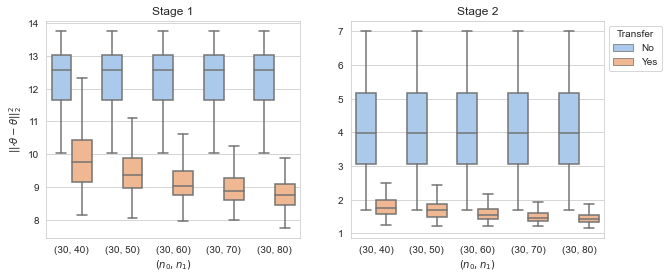

In [84]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(x='$(n_0, n_1)$', y='MSE', hue='Trans', data=df_s0, 
            palette="pastel", showfliers=False, ax=axes[0])

sns.boxplot(x='$(n_0, n_1)$', y='MSE', hue='Trans', data=df_s1, 
            palette="pastel", showfliers=False, ax=axes[1])

axes[0].set_ylabel("$||\\hat \\theta - \\theta||^2_2$")
axes[1].set_ylabel("")

axes[0].set_title("Stage 1")
axes[1].set_title("Stage 2")

#axes[0].legend(bbox_to_anchor=(1.02, 1), title="Transfer", loc="lower center")
axes[0].get_legend().remove()
axes[1].legend(bbox_to_anchor=(1, 1), title="Transfer", loc="upper left")

plt.savefig(os.path.join(RES_DIR, fname + '.pdf'), bbox_inches='tight')

In [55]:

print(f"Saved {os.path.join(RES_DIR, fname + '.pdf')}")


Saved res/chakra-diff-0.2-p-100-n0-50-x-n-e-1.pdf
